### Preliminaries

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pytz
import json

### Question 9.1

In [2]:
def get_tweet_statistics(filename = str):

  # Read in txt file
  tweets = []
  with open(filename) as f:
      for line in f:
          tweets.append(line)

  # Keep track of hours, followers, and retweets
  hours = []
  followers = []
  retweets = []

  # Iterate through each line
  for line in tweets:
    tweet = json.loads(line)
    hours.append(tweet['citation_date'])
    followers.append(tweet['author']['followers'])
    retweets.append(tweet['metrics']['citations']['total'])

  # Get statistics
  num_tweets = len(hours)

  # Average number of tweets per hour
  print("Average number of tweets per hour: ", num_tweets / ((max(hours) - min(hours)) / 3600))

  # Average number of followers of users posting the tweets per tweet
  print("Average number of followers of users posting the tweets per tweet: ", sum(followers) / num_tweets)

  # Average number of retweets per tweet
  print("Average number of retweets per tweet: ", sum(retweets) / num_tweets)


In [4]:
get_tweet_statistics('tweets_#gopatriots.txt')

Average number of tweets per hour:  40.95469800606194
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078


### Question 9.2

In [24]:
def tweets_per_hour(filename = str):

  # Read in txt file
  tweets = []
  with open(filename) as f:
      for line in f:
          tweets.append(line)

  # Keep track of hours
  hours = []

  # Iterate through each line
  for line in tweets:
    tweet = json.loads(line)
    hours.append(tweet['citation_date'])

  # Get tweets per hour
  # Initialize entire array first for efficiency
  tweets_per_hour = np.zeros(int((max(hours)-min(hours))/3600+1))
  start = min(hours)
  for i in hours:
      tweets_per_hour[int((i-start)/3600)] += 1

  # Use barplot
  # Get each hour
  x = np.linspace(0, len(tweets_per_hour)-1, len(tweets_per_hour))
  plt.bar(x, tweets_per_hour)
  plt.xlabel("Hour")
  plt.ylabel("Number of tweets")
  plt.title(filename)
  plt.show()

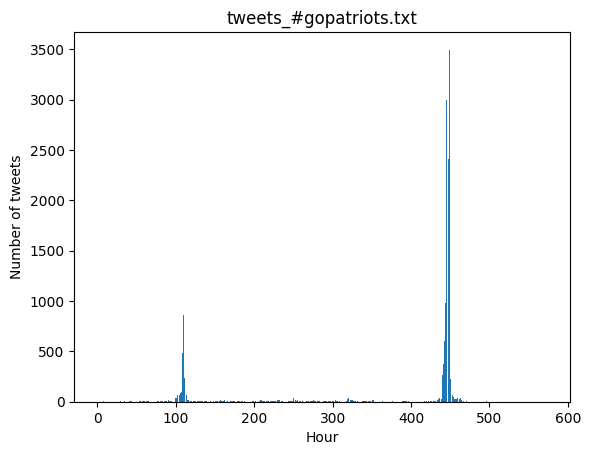

In [25]:
tweets_per_hour('tweets_#gopatriots.txt')